<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;"> Handling Missing Values</h1>
<br>

![](https://fintechprofessor.com/wp-content/uploads/2019/12/close-up-texture-of-a-white-jigsaw-puzzle-in-assembled-state-with-missing-elements-forming-a-blue-pad_t20_WxKR61.jpg)

<div class = 'alert alert-info' style = 'color:blue'> 💡 This notebook is part of the <a href="http://iitg.ac.in/sa/caciitg/course" style="color: #002d5e">Summer Analytics 2021</a> course curated by <a href="https://www.linkedin.com/company/caciitg/mycompany/" style="color: black">Consulting & Analytics Club, IIT Guwahati</a>. This notebook intends to introduce the readers to various different Imputaion techniques and How to deal with missing values in general with the help of <i>pandas</i> and <i>sklearn</i></div>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Introduction](#1)
    * [1.1 Import Required Libraries](#1.1)
    * [1.2 Exploring the Data](#1.2)
    * [1.3 Helper Function](#1.3)
* [2. Dropping Rows and Columns](#2)
    * [2.1 Dropping Rows with Missing Values](#2.1)
    * [2.2 Dropping Columns with Missing Values](#2.2)
* [3. Univariate vs Multivariate Imputation](#3)
    * [3.1 Univariate Imputation](#3.1)
        * [3.1.1 Simple Imputer](#3.1.1)
    * [3.2 Multivariate Imputation](#3.2)
        * [3.2.1 KNN Imputer](#3.2.1)
        * [3.2.2 Iterative Imputer](#3.2.2)
* [4. Missing Indicator](#4)
* [5. Missing Indicator + Iterative Imputer](#5)
* [6. Further Readings](#6)

<a id = '1'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 1. Introduction </h2>

<a id = '1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.1 Import Required Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# displays all the columns
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (18, 8);

<a id = '1.2'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight:normal; border-radius: 100px 100px; text-align: center">1.2 Exploring the Data </h2>

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">We have 81 columns in total, 80 of them are feature columns and <code>SalePrice</code> is the target column</span>

In [5]:
feature_cols = [col for col in df.columns if col not in ['SalePrice']]
target_cols = ['SalePrice']

cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]

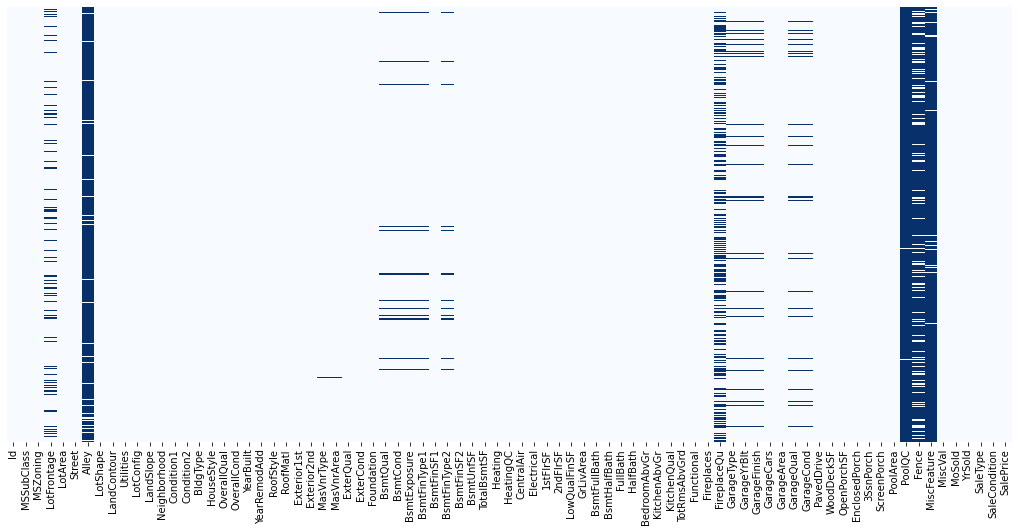

In [6]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

<a id = '1.3'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">1.3 Helper Function</h2>

In [7]:
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

Let's take an example to understand what this function is doing <br>
Suppose we have a column `['apple', 'mango', 'banana', 'apple', 'banana', NaN]`

In [8]:
demo_col = pd.Series(['apple', 'mango', 'banana', 'apple', 'banana', np.NaN])
print(f'Unique Values in the Column: {demo_col.unique()}')
print(f'Unique Values of type string: {[i for i in demo_col.unique() if type(i) == str]}')

Unique Values in the Column: ['apple' 'mango' 'banana' nan]
Unique Values of type string: ['apple', 'mango', 'banana']


In [9]:
le = LabelEncoder()
unique_without_nan = pd.Series([i for i in demo_col.unique() if type(i) == str])
le.fit(unique_without_nan)
demo_col.apply(lambda x: le.transform([x])[0] if type(x) == str else x)

0    0.0
1    2.0
2    1.0
3    0.0
4    1.0
5    NaN
dtype: float64

<a id = '2'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 2. Dropping Rows and Columns </h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">This isn't an imputation technique, but this might be the first thing that comes in mind to deal with missing values</span>

<a id = '2.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">2.1 Dropping Rows with Missing Values</h2>

In [10]:
sum(df.isna().sum(axis=1) > 0)

1460

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">If we drop all the rows with any missing value we aren't left with any row</span>

<a id = '2.2'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">2.2 Dropping Columns with Missing Values</h2>

In [11]:
sum(df.isna().sum(axis=0) > 0)

19

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">If we drop all columns with missing values we lose 19 columns</span>

<a id = '3'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 3. Univariate vs Multivariate Imputation </h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. <code>SimpleImputer</code>). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. <code>IterativeImputer</code>).</span>

<a id = '3.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">3.1 Univariate Imputation</h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">We can impute missing values with a provided constant value, or using the statistics (mean, median or most frequent) of each column.</span>

<a id = '3.1.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 28px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">3.1.1 Simple Imputer</h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">Imputing Continuous Variables</span>

In [12]:
df_simple_imputer = df.copy()

In [13]:
imputer = SimpleImputer(strategy='mean')

df_simple_imputer[cont_cols] = imputer.fit_transform(df_simple_imputer[cont_cols])

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">Imputing Categorical Variables</span>

In [14]:
imputer = SimpleImputer(strategy='most_frequent')

df_simple_imputer[cat_cols] = imputer.fit_transform(df_simple_imputer[cat_cols])

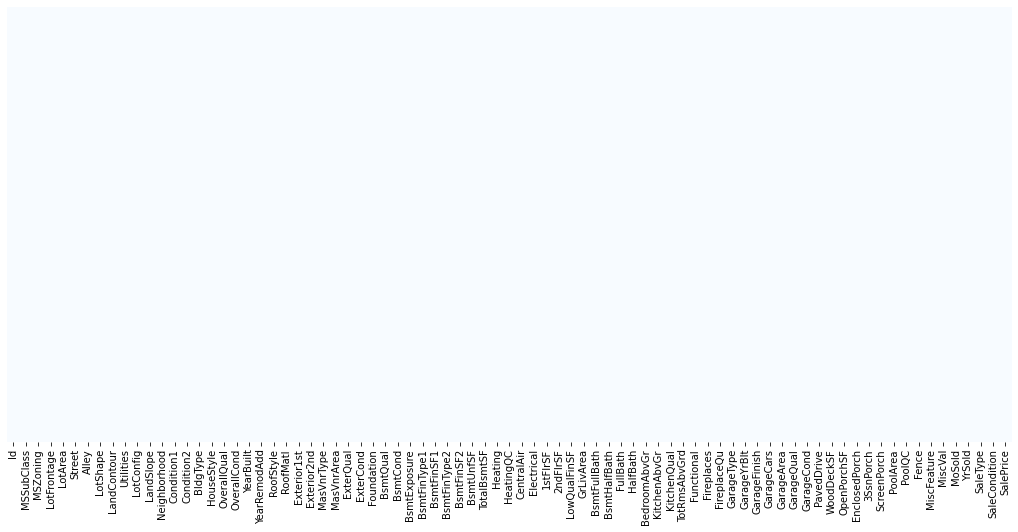

In [15]:
sns.heatmap(df_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

<a id = '3.2'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 35px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">3.2 Multivariate Imputation</h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">A strategy for imputing missing values by modeling each feature with missing values as a function of other features</span>

<a id = '3.2.1'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 28px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">3.2.1 KNN Imputer</h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">KNNImputer doesn't work on strings so we need to encode the strings into float or int keeping the <code>NaN</code> values</span> <br>
<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">This is where we will use the helper function we defined earlier</span>

In [16]:
df_knn_imputer = df.copy()

In [17]:
for col in cat_cols:
    encode_missing_columns(df_knn_imputer, col)

In [18]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols] = knn_imputer.fit_transform(df_knn_imputer[feature_cols])

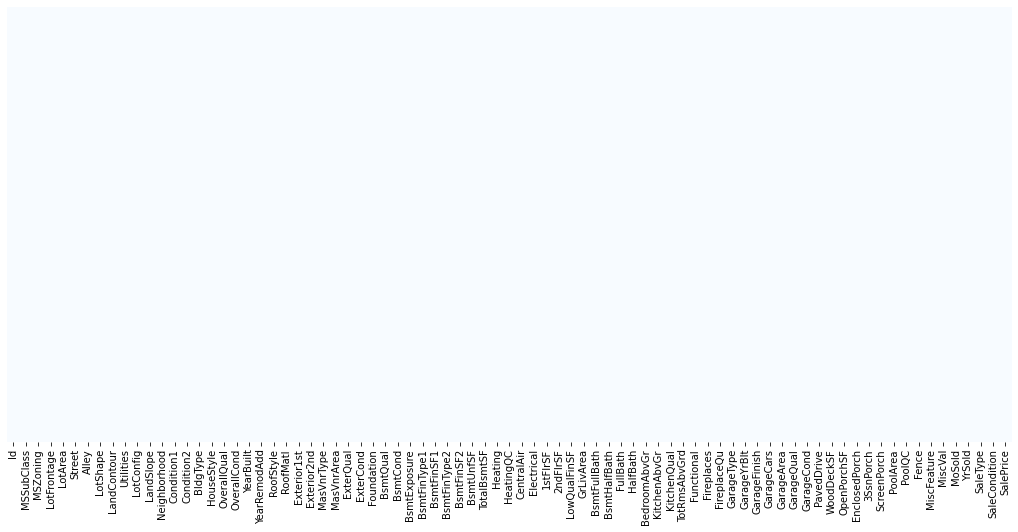

In [19]:
sns.heatmap(df_knn_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

<a id = '3.2.2'></a>

<h2 style = "background-color: #f6f5f5; color : #fe346e; font-size: 28px; font-family:garamond; font-weight: normal; border-radius: 100px 100px; text-align: center">3.2.2 Iterative Imputer</h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">Like KNNImputer, Iterative Imputer also doesn't work on strings</span>

In [20]:
df_iterative_imputer = df.copy()

In [21]:
for col in cat_cols:
    encode_missing_columns(df_iterative_imputer, col)

In [22]:
itr_imputer = IterativeImputer()

df_iterative_imputer[feature_cols] = itr_imputer.fit_transform(df_iterative_imputer[feature_cols])

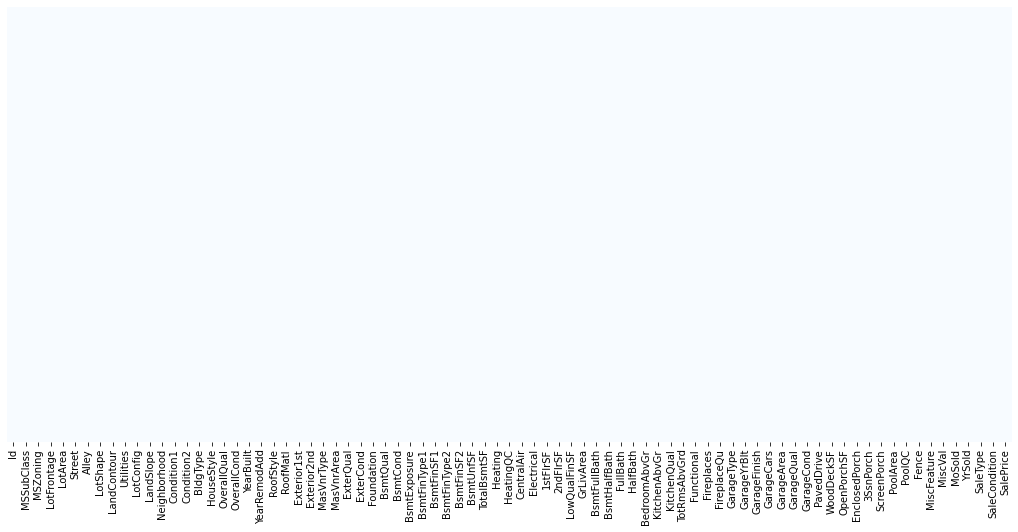

In [23]:
sns.heatmap(df_iterative_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

<a id = '4'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 4. Missing Indicator </h2>

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">Most of the times the missing values are not randomly distributed across observations but are distributed within one or more sub-samples. Therefore, missingness itself might be a good indicator to classify the labels</span>

In [24]:
from sklearn.impute import MissingIndicator

In [25]:
df_miss = df.copy()

In [26]:
miss_indicator = MissingIndicator()

X_miss = miss_indicator.fit_transform(df_miss[feature_cols])

In [27]:
X_miss.shape

(1460, 19)

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">Recall that in <a href="#2.2">Section 2.2</a> we had seen that if we drop all columns with missing values we lose 19 columns</span>

<a id = '5'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 5. Missing Indicator + Iterative Imputer </h2>

In [28]:
df_miss_itr = df.copy()

In [29]:
for col in cat_cols:
    encode_missing_columns(df_miss_itr, col)

In [30]:
# setting add_indicator=True returns missing indicators alongwith the imputed dataframe
itr_imputer = IterativeImputer(add_indicator=True) 

X = itr_imputer.fit_transform(df_miss_itr[feature_cols])

In [31]:
X.shape

(1460, 99)

<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">We have 99 feature columns now (80 original features + 19 missing indicator features) and 1 target column</span>

<a id = '6'></a>
<h2 style = "font-family:garamond; font-size:50px; background-color: #f6f6f6; color : #fe346e; border-radius: 100px 100px; text-align:center"> 6. Further Readings </h2>

1. [KNN Imputer Algorithm](https://www.youtube.com/watch?v=AHBHMQyD75U&list=PLlg4M31xJeYa7XcJZWypot8l7R-0E65Ls)
2. [Iterative Imputer Algorithm](https://www.youtube.com/watch?v=WPiYOS3qK70&list=PLlg4M31xJeYa7XcJZWypot8l7R-0E65Ls)